## [한국어 텍스트 전처리 ]

In [1]:
import urllib.request as req
import pandas as pd
from konlpy.tag import Okt
from nltk import FreqDist
import numpy as np
import matplotlib.pyplot as plt

#### (1) 데이터 준비

In [3]:
naver_url="https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt"
filename='../DATA/rating.txt'

In [132]:
# URL에 존재하는 데이터를 파일로 저장
fn, obj =req.urlretrieve(naver_url, filename)
print(fn)

rating.txt


- DataFrame으로 변환

In [4]:
dataDF=pd.read_table(filename)

In [15]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [6]:
print( dataDF.head(), dataDF.tail() , sep='\n\n')

         id                                           document  label
0   8112052                                어릴때보고 지금다시봐도 재밌어요ㅋㅋ      1
1   8132799  디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...      1
2   4655635               폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.      1
3   9251303  와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...      1
4  10067386                        안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.      1

             id                             document  label
199995  8963373                       포켓 몬스터 짜가 ㅡㅡ;;      0
199996  3302770                                쓰.레.기      0
199997  5458175    완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.      0
199998  6908648  왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ      0
199999  8548411                      포풍저그가나가신다영차영차영차      0


In [7]:
## 샘플 데이터 추출
sample_datas=dataDF[:100].copy()
sample_datas.shape

(100, 3)

#### [ 데이터 전처리 ]

(1) 한글, 공백 제외한 문자들 제거 ==> 정규표현식

In [8]:
hangul_wspace= "[^ㄱ-ㅎㅏ-ㅣ가-힣 ]"

In [9]:
sample_datas['document'] = sample_datas['document'].str.replace(hangul_wspace,"", regex=True)

In [31]:
sample_datas[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁 나오나요 나오면 빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


(2) 불용어 리스트 생성

In [72]:
stop_words=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다','을']
with open('../DATA/koreanStopword.txt') as f:
    stop_words=f.read()
    stop_words=[x for x in stop_words if x!='\n']
    
stop_words

['가',
 '가',
 '까',
 '스',
 '로',
 '가',
 '령',
 '가',
 '지',
 '각',
 '각',
 '각',
 '각',
 '자',
 '각',
 '종',
 '갖',
 '고',
 '말',
 '하',
 '자',
 '면',
 '같',
 '같',
 '다',
 '같',
 '이',
 '개',
 '개',
 '의',
 '치',
 '않',
 '고',
 '거',
 '니',
 '와',
 '거',
 '바',
 '거',
 '의',
 '것',
 '것',
 '과',
 ' ',
 '같',
 '이',
 '것',
 '들',
 '게',
 '다',
 '가',
 '게',
 '우',
 '다',
 '겨',
 '우',
 '견',
 '지',
 '에',
 '서',
 '결',
 '과',
 '에',
 ' ',
 '이',
 '르',
 '다',
 '결',
 '국',
 '결',
 '론',
 '을',
 ' ',
 '낼',
 ' ',
 '수',
 ' ',
 '있',
 '다',
 '겸',
 '사',
 '겸',
 '사',
 '경',
 '우',
 '고',
 '려',
 '하',
 '면',
 '고',
 '로',
 '곧',
 '공',
 '동',
 '으',
 '로',
 '과',
 '과',
 '연',
 '관',
 '계',
 '가',
 ' ',
 '있',
 '다',
 '관',
 '계',
 '없',
 '이',
 '관',
 '련',
 '이',
 ' ',
 '있',
 '다',
 '관',
 '하',
 '여',
 '관',
 '한',
 '관',
 '해',
 '서',
 '는',
 '구',
 '구',
 '체',
 '적',
 '으',
 '로',
 '구',
 '토',
 '하',
 '다',
 '그',
 '그',
 '것',
 '그',
 '녀',
 '그',
 '들',
 '그',
 '때',
 '그',
 '래',
 '그',
 '래',
 '도',
 '그',
 '래',
 '서',
 '그',
 '러',
 '그',
 '러',
 '나',
 '그',
 '러',
 '니',
 '그',
 '러',
 '니',
 '까',
 '그',
 '러',
 '면',
 '그'

(3) 형태소 분석

In [73]:
okt_tokenizer= Okt()

In [74]:
# 문장 마다 토큰 분리
token_datas=[]
for sentence in sample_datas.document:
    wtoken=okt_tokenizer.morphs(sentence)
    ww=[w for w in wtoken if w not in stop_words]
    token_datas.append(ww)

In [75]:
len(token_datas)

100

In [76]:
wordList=[]
for tt in token_datas:
    print(tt)
    wordList += tt

['어릴', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ']
['디자인', '배우는', '학생', '으로', '외국', '디자이너', '일군', '전통', '통해', '발전', '해가는', '문화', '산업', '부러웠는데', '사실', '우리나라', '에서도', '어려운', '시절', '끝', '까지', '열정', '지킨', '노라노', '같은', '전통', '있어', '같은', '사람', '꿈', '꾸고', '이뤄', '나갈', '있다는', '감사합니다']
['폴리스스토리', '시리즈', '부터', '뉴', '까지', '버릴께', '하나', '없음', '최고']
['연기', '진짜', '쩔구나', '지루할거라고', '생각', '했는데', '몰입', '해서', '봤다', '그래', '이런게', '진짜', '영화']
['안개', '자욱한', '밤하늘', '있는', '초승달', '같은', '영화']
['사랑', '해본', '사람', '라면', '처음', '부터', '끝', '까지', '웃을수', '있는', '영화']
['완전', '감동', '입니다', '다시', '봐도', '감동']
['전쟁', '나오나요', '나오면', '빠', '보고', '싶음']
['굿']
['바보', '아니라', '병', '쉰', '인듯']
['나이', '같은', '영화', '지금', '감동', '이다', '하지만', '훗날', '다시', '보면대', '사하나', '감정', '완벽하게', '이해', '할것만', '같다']
['재밌다']
['고질', '라니', '귀엽다', '능', 'ㅋㅋ']
['영화', '오페라', '화', '라고', '해야', '작품', '극단', '평', '갈림', '어쩔', '없는']
['반전', '좋았']
['평점', '낮아', '긴장감', '스릴', '감', '진짜', '최고', '인데', '진짜', '전장', '에서', '느끼는', '공포', '생생하게', '해준다']
['고시', '랑', '소재', '같을', '아무런', '관련', '없음'

In [78]:
len(wordList), wordList[:10]

(927, ['어릴', '보고', '지금', '다시', '봐도', '재밌어요', 'ㅋㅋ', '디자인', '배우는', '학생'])

#### (4) 단어집합 생성

- (4-1) 단어빈도수 Dict 생성

In [79]:
key_list= np.unique(wordList).tolist()
len(key_list), key_list
voca={x:0 for x in key_list}

In [80]:
for x in wordList:
    voca[x]+=1

voca=
voca

In [81]:
voca.get('영화', 0)

27

In [82]:
vocaDF=pd.DataFrame([voca]).T
vocaDF

,0
ㄷㄷ,1
ㅆ,1
ㅇ,1
ㅇㅇ,1
ㅋ,1
...,...
훌륭한,1
훗날,1
흘리게,1
흥미진진,2


In [83]:
vocaDF2=vocaDF.sort_values(0, ascending=False)
vocaDF2

,0
영화,27
너무,10
최고,10
정말,8
진짜,7
...,...
볼가치가,1
볼줄을,1
볼펜,1
봉임,1


In [84]:
vocaDF2[0].unique()

array([27, 10,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [85]:
vocaDF2[0].value_counts()

0
1     574
2      65
3      21
5       8
4       5
6       4
7       3
10      2
27      1
8       1
Name: count, dtype: int64

In [86]:
vocaDF2[vocaDF2[0]>1].shape

(110, 1)

In [87]:
vocaDF2[vocaDF2[0]==1].shape

(574, 1)

In [69]:
vc=vocaDF2[0].value_counts()
vc.shape, vc.index

((11,), Index([1, 2, 3, 5, 6, 4, 7, 10, 27, 9, 8], dtype='int64', name=0))

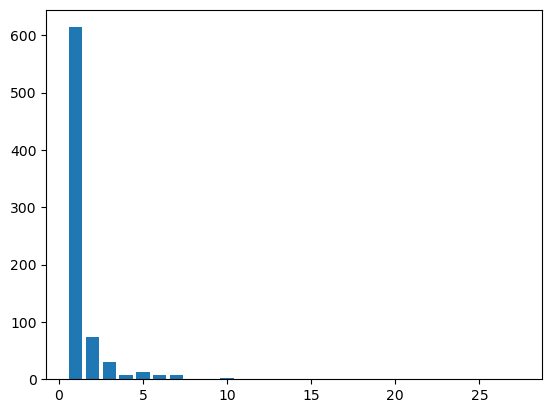

In [88]:
plt.bar(vc.index, vc)
plt.show()

- nltk FreqDist 사용

In [89]:
vocab = FreqDist(np.hstack(token_datas))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 684


In [90]:
vocab['어릴']

3

In [90]:
vocab_size = 500
# 상위 vocab_size개의 단어만 보존
vocab = vocab.most_common(vocab_size)
print(f'단어 집합의 크기 : {len(vocab)}')

단어 집합의 크기 : 500


In [92]:
for index, word in enumerate(vocab):
    print(index, word)

0 ('영화', 27)
1 ('최고', 10)
2 ('너무', 10)
3 ('정말', 8)
4 ('진짜', 7)
5 ('생각', 7)
6 ('감동', 7)
7 ('까지', 6)
8 ('사람', 6)
9 ('연기', 6)
10 ('봤는데', 6)
11 ('지금', 5)
12 ('다시', 5)
13 ('ㅋㅋ', 5)
14 ('같은', 5)
15 ('부터', 5)
16 ('에서', 5)
17 ('마음', 5)
18 ('뭐', 5)
19 ('보고', 4)
20 ('으로', 4)
21 ('사실', 4)
22 ('평점', 4)
23 ('하는', 4)
24 ('어릴', 3)
25 ('봐도', 3)
26 ('했는데', 3)
27 ('이다', 3)
28 ('같다', 3)
29 ('화', 3)
30 ('인데', 3)
31 ('랑', 3)
32 ('마지막', 3)
33 ('대한', 3)
34 ('명작', 3)
35 ('최고다', 3)
36 ('재밌게', 3)
37 ('봄', 3)
38 ('친구', 3)
39 ('느낌', 3)
40 ('남자', 3)
41 ('매력', 3)
42 ('ㅎ', 3)
43 ('이런', 3)
44 ('재밌습니다', 3)
45 ('전통', 2)
46 ('문화', 2)
47 ('우리나라', 2)
48 ('에서도', 2)
49 ('끝', 2)
50 ('하나', 2)
51 ('없음', 2)
52 ('해서', 2)
53 ('봤다', 2)
54 ('있는', 2)
55 ('사랑', 2)
56 ('라면', 2)
57 ('처음', 2)
58 ('완전', 2)
59 ('굿', 2)
60 ('감정', 2)
61 ('라고', 2)
62 ('작품', 2)
63 ('없는', 2)
64 ('긴장감', 2)
65 ('갈수록', 2)
66 ('더욱', 2)
67 ('없이', 2)
68 ('역시', 2)
69 ('없다', 2)
70 ('용서', 2)
71 ('비판', 2)
72 ('시간', 2)
73 ('영상', 2)
74 ('한번', 2)
75 ('보고싶다', 2)
76 ('아름답고',

(5) 수치화

(5-1) 정수 인코딩

In [93]:
word_to_index = {word : index + 2 for index, word in enumerate(voca)}
word_to_index['pad'] = 1
word_to_index['unk'] = 0

In [94]:
word_to_index

{'ㄷㄷ': 2,
 'ㅆ': 3,
 'ㅇ': 4,
 'ㅇㅇ': 5,
 'ㅋ': 6,
 'ㅋㅋ': 7,
 'ㅋㅋㅋ': 8,
 'ㅋㅋㅋㅋ': 9,
 'ㅎ': 10,
 'ㅠ': 11,
 'ㅠㅠ': 12,
 'ㅡㅡ': 13,
 '가고싶은': 14,
 '가면': 15,
 '가슴속': 16,
 '가을': 17,
 '가을로': 18,
 '가족': 19,
 '각심': 20,
 '갈림': 21,
 '갈수록': 22,
 '감': 23,
 '감독': 24,
 '감동': 25,
 '감사합니다': 26,
 '감정': 27,
 '감탄': 28,
 '갔다해': 29,
 '강렬한': 30,
 '강압': 31,
 '강추': 32,
 '같다': 33,
 '같더라고요': 34,
 '같아요': 35,
 '같은': 36,
 '같을': 37,
 '걍': 38,
 '거려': 39,
 '거슬려서': 40,
 '걱정': 41,
 '걸고': 42,
 '겁나': 43,
 '격투씬': 44,
 '결말': 45,
 '경찰서': 46,
 '계속': 47,
 '고시': 48,
 '고질': 49,
 '공간': 50,
 '공포': 51,
 '관련': 52,
 '광': 53,
 '괜찬': 54,
 '굉장히': 55,
 '교복': 56,
 '굳': 57,
 '굿': 58,
 '굿굿굿': 59,
 '권력': 60,
 '귀엽다': 61,
 '그거': 62,
 '그것': 63,
 '그냥': 64,
 '그대': 65,
 '그라샴': 66,
 '그래': 67,
 '그런': 68,
 '그런대': 69,
 '그리고': 70,
 '그저': 71,
 '극단': 72,
 '극적': 73,
 '기다려야': 74,
 '기대': 75,
 '기억': 76,
 '긴장감': 77,
 '까지': 78,
 '까지봣다': 79,
 '깨우쳐': 80,
 '깨워주는': 81,
 '꺼내기도': 82,
 '꼭': 83,
 '꾸고': 84,
 '꿈': 85,
 '뀰잼': 86,
 '끝': 87,
 '끼리': 88,
 '나갈': 89,
 '나도': 90,
 '나불'

(5)문장 수치화

In [95]:
encoded = []
for line in token_datas: #입력 데이터에서 1줄씩 문장을 읽음
    temp = []
    for w in line: #각 줄에서 1개씩 글자를 읽음
      try:
        temp.append(word_to_index[w]) # 글자를 해당되는 정수로 변환
      except KeyError: # 단어 집합에 없는 단어일 경우 unk로 대체된다.
        temp.append(word_to_index['unk']) # unk의 인덱스로 변환

    encoded.append(temp)

In [96]:
encoded

[[364, 236, 581, 130, 257, 528, 7],
 [163,
  228,
  641,
  444,
  422,
  162,
  482,
  537,
  619,
  222,
  651,
  205,
  290,
  266,
  287,
  429,
  389,
  361,
  324,
  87,
  78,
  401,
  585,
  120,
  36,
  537,
  497,
  36,
  283,
  85,
  84,
  460,
  89,
  496,
  26],
 [630, 322, 269, 125, 78, 229, 633, 380, 603],
 [399, 587, 592, 582, 295, 664, 203, 656, 263, 67, 457, 587, 410],
 [347, 511, 224, 493, 602, 36, 410],
 [284, 655, 283, 171, 598, 269, 87, 78, 437, 493, 410],
 [419, 25, 490, 130, 257, 25],
 [536, 93, 97, 278, 236, 333],
 [58],
 [216, 336, 234, 314, 478],
 [100, 36, 410, 581, 25, 451, 640, 682, 130, 245, 289, 27, 418, 474, 649, 33],
 [526],
 [49, 170, 61, 128, 7],
 [410, 416, 674, 169, 657, 512, 72, 626, 21, 369, 374],
 [220, 566],
 [628, 108, 77, 315, 23, 587, 603, 477, 587, 535, 388, 126, 51, 296, 663],
 [48, 172, 308, 37, 340, 52, 380],
 [133, 603],
 [15, 22, 143, 279, 213, 677],
 [295, 381, 262, 293, 410, 117, 603, 179, 161, 30, 488, 487],
 [415, 546, 232, 316],
 [6

- 패딩

리뷰의 최대 길이 : 41
리뷰의 최소 길이 : 1
리뷰의 평균 길이 : 9.270000


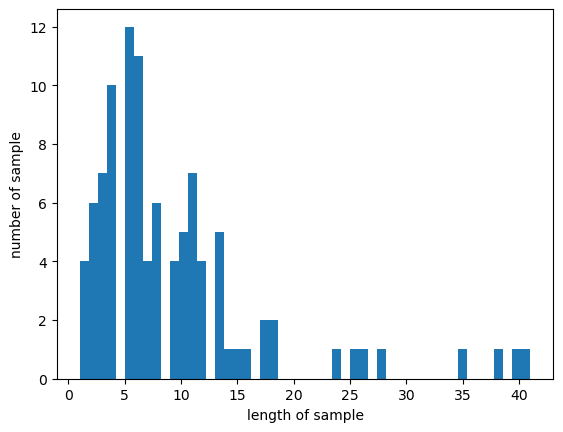

In [97]:
max_len = max(len(l) for l in encoded)
print('리뷰의 최대 길이 : %d' % max_len)
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))
plt.hist([len(s) for s in encoded], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [98]:
for line in encoded:
    if len(line) < max_len: # 현재 샘플이 정해준 길이보다 짧으면
        line += [word_to_index['pad']] * (max_len - len(line)) # 나머지는 전부 'pad' 토큰으로 채운다.

In [99]:
print('리뷰의 최대 길이 : %d' % max(len(l) for l in encoded))
print('리뷰의 최소 길이 : %d' % min(len(l) for l in encoded))
print('리뷰의 평균 길이 : %f' % (sum(map(len, encoded))/len(encoded)))

리뷰의 최대 길이 : 41
리뷰의 최소 길이 : 41
리뷰의 평균 길이 : 41.000000


In [100]:
print(encoded[:3])

[[364, 236, 581, 130, 257, 528, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [163, 228, 641, 444, 422, 162, 482, 537, 619, 222, 651, 205, 290, 266, 287, 429, 389, 361, 324, 87, 78, 401, 585, 120, 36, 537, 497, 36, 283, 85, 84, 460, 89, 496, 26, 1, 1, 1, 1, 1, 1], [630, 322, 269, 125, 78, 229, 633, 380, 603, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]
